# Exploratory Data Analysis.

* Exploring the dataset to see what we're dealing with here.

### Step 1: Loading the modules and data.

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 32
plt.style.use('fivethirtyeight')

In [339]:
xg1 = pd.read_csv('xgdata.csv') # df to add features to main df
xg = pd.read_csv('finalxgdata.csv') # main df to use

#adding some features for visual EDA
xg['shotX'],xg['shotY']=xg1['shotX'],xg1['distY']

# adding some noise to better visualise the shots
list1 = np.random.rand(len(xg))
list2 = np.random.rand(len(xg))
list1 = list1 - 0.5
list2 = list2 - 0.5
xg1['list1'] = list1
xg1['list2'] = list2
xg1['list3'] = 12*np.ones(len(xg))
xg['shotX'],xg['shotY']=xg['shotX']+xg1['list1'],xg['shotY']+xg1['list2']
xg['shotY'] = xg1['list3'] - xg['shotY']

# adding a 'minute' feature to add another layer of analysis
xg1['minute']=xg1.Click.str[:2].astype(int)

# test code
# dftest = xg[xg['shotDist'] > 6 ]
# dftest.head(30)

In [340]:
# calculating goalface coordinates for plotting shots on the goal.

keys = ['s{}'.format(i) for i in range(1, 25)]
keys1 = ['OT {}'.format(i) for i in range(1, 9)]
for item in keys1:
    keys.append(item)
    
values = []
values1 = [[_,4] for _ in range(1,7)]
values2 = [[_,3] for _ in range(1,7)]
values3 = [[_,2] for _ in range(1,7)]
values4 = [[_,1] for _ in range(1,7)]
values5 = [[-1,1.5],[-1,3.5],[-1,5],[2,5],[5,5],[8,5],[8,3.5],[8,1.5]]

for _ in values1,values2,values3,values4,values5:
    values.append(_)

valuesf = []
for x in range(0,5):
    for item in values[x]:
        valuesf.append(item)

goalDict = dict(zip(keys, valuesf))
xg1['goalLoc1'] = xg1['goalLoc'].apply(lambda _: goalDict[_])

#adding some noise
listf = [list(x) for x in zip(list1,list2)]
xg1['listf'] = listf         
xg1['goalLoc2'] = xg1.apply(lambda row: [row.goalLoc1[0] + row.listf[0], 5 - row.goalLoc1[1] + row.listf[1]], axis=1)
xg1.head()


,Unnamed: 0,N,Category,Start,Click,End,Descriptors,Des_1,Des_2,Des_3,Des_4,Des_5,Des_6,shotXPrelim,shotYPrelim,shotX,...,isGoal,isHeader,isBigChance,isCounter,isTapIn,prevD5,prevD6,isThroughball,goalLoc,list1,list2,list3,minute,goalLoc1,listf,goalLoc2
0,9,1,R Goal,53:47:04,53:49:04,53:50:04,NaN,TG,e8,s11,Long Range,NaN,NaN,e,8,5,...,1,0,0,0,0,NaN,NaN,0,s11,-0.311192,0.452017,12.0,53,"[5, 3]","[-0.3111917345845734, 0.45201723486776857]","[4.688808265415426, 2.4520172348677685]"
1,12,2,R Goal,54:11:03,54:13:03,54:14:03,NaN,B3,f11,s17,NaN,NaN,NaN,f,11,6,...,1,0,0,0,0,NaN,NaN,0,s17,0.445526,-0.499821,12.0,54,"[5, 2]","[0.4455256575583031, -0.49982074740973503]","[5.445525657558303, 2.500179252590265]"
2,17,1,L Shot On,54:34:03,54:36:03,54:37:03,NaN,G4,g4,s21,NaN,NaN,NaN,g,4,7,...,0,0,0,0,0,NaN,NaN,0,s21,0.498573,0.346605,12.0,54,"[3, 1]","[0.4985725251645651, 0.3466053150041929]","[3.498572525164565, 4.346605315004193]"
3,21,1,R Shot On,55:06:24,55:08:24,55:09:24,NaN,G4,d4,s16,NaN,NaN,NaN,d,4,4,...,0,0,0,0,0,NaN,NaN,0,s16,0.036394,0.264433,12.0,55,"[4, 2]","[0.03639400571358897, 0.2644326868027894]","[4.036394005713589, 3.2644326868027895]"
4,25,2,R Shot On,55:20:07,55:22:07,55:23:07,NaN,B2,e10,s21,NaN,NaN,NaN,e,10,5,...,0,0,0,0,0,Through Ball,NaN,1,s21,0.232406,-0.279830,12.0,55,"[3, 1]","[0.23240592140292848, -0.2798299196556233]","[3.2324059214029286, 3.720170080344377]"


### Step 2: Preliminary data analysis.

In [341]:
xg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     478 non-null    int64  
 1   N              478 non-null    int64  
 2   Category       478 non-null    object 
 3   Start          478 non-null    object 
 4   Click          478 non-null    object 
 5   End            478 non-null    object 
 6   Descriptors    0 non-null      float64
 7   Des_1          478 non-null    object 
 8   Des_2          478 non-null    object 
 9   Des_3          478 non-null    object 
 10  Des_4          151 non-null    object 
 11  Des_5          32 non-null     object 
 12  Des_6          1 non-null      object 
 13  shotXPrelim    478 non-null    object 
 14  shotYPrelim    478 non-null    int64  
 15  shotX          478 non-null    int64  
 16  shotY          478 non-null    int64  
 17  goalpoint      478 non-null    int64  
 18  distY     

In [342]:
xg.describe()

,Unnamed: 0,shotDist,shotAng,isShot,isOnTarget,isGoal,isHeader,isBigChance,isCounter,isTapIn,isThroughball,shotX,shotY
count,478.000000,478.000000,478.000000,478.0,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,1036.387029,3.239364,66.532640,1.0,0.771967,0.476987,0.012552,0.169456,0.008368,0.052301,0.064854,4.992406,9.166768
std,591.676220,1.513127,17.637041,0.0,0.420004,0.499993,0.111448,0.375547,0.091190,0.222867,0.246525,1.650872,1.477739
min,9.000000,1.000000,18.434949,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.520410,0.999065
25%,501.750000,2.236068,56.309932,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.937063,8.646118
50%,1065.000000,3.000000,63.434949,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.106066,9.440688
75%,1560.250000,4.092329,81.869898,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.162348,10.116617
max,2037.000000,11.000000,90.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.489813,11.494641


### Step 3: Visual EDA.

In [343]:
from matplotlib.patches import Arc

In [344]:
# plotting shots on to a pitch

def pitch_creator(size=(10,7)):
    with plt.style.context('bmh'):
        fig = plt.figure(figsize=size)
        plt.axis([-0.5, 12.5, -0.5, 10.6])
        plt.grid(False)


        plt.plot([0, 0], [-0.2, 10.2], color='black')
        plt.plot([11.5, 11.5], [-0.2, 10.2], color="black")
        plt.plot([0, 11.5], [-0.2, -0.2], color='black')
        plt.plot([0, 11.5], [10.2, 10.2], color='black')

        centreCircle = plt.Circle((0, 5.05), 1, color='black', fill=False)

        # right penalty area
        plt.plot([11.5, 10], [2, 2], color='black')
        plt.plot([10, 10], [2, 8], color='black')
        plt.plot([10, 11.5], [8, 8], color='black')

        # right six yard box
        plt.plot([11.5, 11], [4, 4], color='black')
        plt.plot([11, 11], [4, 6], color='black')
        plt.plot([11, 11.5], [6, 6], color='black')


        # right goal posts
        plt.plot([11.5, 11.7], [4.5, 4.5], color='black')
        plt.plot([11.5, 11.7], [5.5, 5.5], color='black')
        plt.plot([11.7, 11.7], [4.5, 5.5], color='black')


        # right Arc
        rightArc = Arc((10.55, 5.05), height=1.83, width=1.83, angle=0,
                       theta1=130, theta2=230, color='black')

        ax = plt.gca()
        ax.add_patch(centreCircle)
        ax.add_patch(rightArc)
        ax.set_ylim(ax.get_ylim()[::-1])
        return fig

def plotter(fig,loc_list,color,label):
    
    loc_x=[]
    loc_y=[]
    for loc in loc_list:
        loc_x.append(loc[0])
        loc_y.append(loc[1])
            
    plt.scatter(loc_x,loc_y,c=color,alpha=1,label=label,edgecolor='black',linewidth=0.5)
    plt.axis('off')
    
    
    return fig

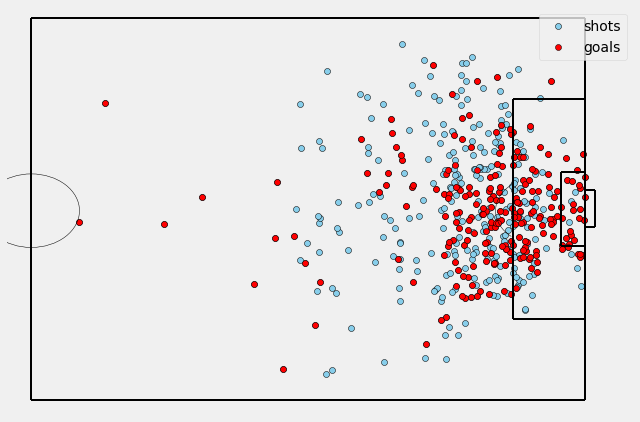

In [345]:
#plotting all data
plt1 = pitch_creator()
plt1 = plotter(plt,xg[['shotY','shotX']].values,'skyblue','shots')
plt1 = plotter(plt,xg[xg['isGoal']==1][['shotY','shotX']].values,'red','goals')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('pitchmap.png')

### Inference:

* We can see that as shots get further and wider, their frequency and goal probability both seem to take a dip.
* However, we also see that the furthest shots all turned into a goal. Why? This could be because of how the information is collected, i.e, generally attempts from that far away are considered to be failed passes, however if they end up in goal, they cannot be tagged as passes and hence we see a near perfect coversion rate from really far away.

In [346]:
def goal_creator(size=(10,7)):
    with plt.style.context('bmh'):
        fig = plt.figure(figsize=size)
        plt.axis([-1, 8, 0, 5.5])
        plt.grid(True)

        plt.plot([0.35, 0.35], [0.7, 4.7], color='black')
        plt.plot([6.65, 6.65], [0.7, 4.7], color="black")
        plt.plot([0.34, 6.65], [0.7, 0.7], color='black')
        #plt.plot([0, 7], [4.2, 4.2], color='black')
        
        ax = plt.gca()
        ax.set_ylim(ax.get_ylim()[::-1])
        return fig
    
def goalplotter(fig,loc_list,color,label):
    
    loc_x=[]
    loc_y=[]
    for loc in loc_list:
        loc_x.append(loc[0])
        loc_y.append(loc[1])
            
    plt.scatter(loc_x,loc_y,c=color,alpha=1,label=label,edgecolor='black',linewidth=0.5)
    plt.axis('off')
    
    
    return fig

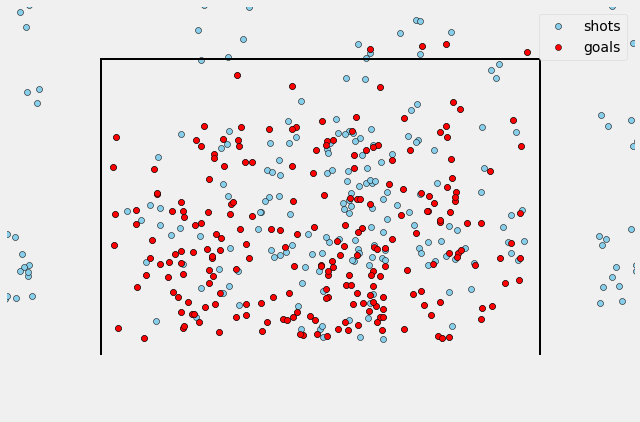

In [347]:
#plotting all data
plt1 = goal_creator()
plt1 = goalplotter(plt,xg1['goalLoc2'].values,'skyblue','shots')
plt1 = goalplotter(plt,xg1[xg1['isGoal']==1]['goalLoc2'].values,'red','goals')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('goalmap.png')

### Inference:

* We can observe here that, the shots are more densely packed on the bottom half of the goal, and that very few shots made it to the top corner, however the shots that made it to the top corner seem to be scored at a highly efficient rate.

### Step 4: Gauging the Correlations of the Features.

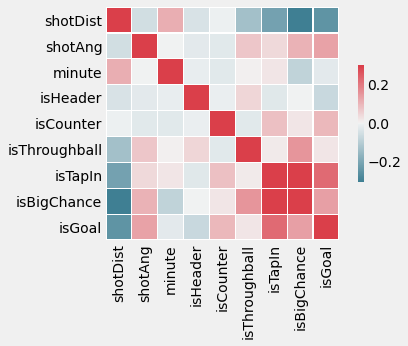

In [348]:
# Making a correlation heatmap.

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(xg1[['shotDist','shotAng','minute','isHeader','isCounter','isThroughball','isTapIn','isBigChance','isGoal']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#### Inference:

* We can see that throughballs (weak), counter attacks (mediuam), and shot angle(medium), big chances (strong), and tap ins (strongest)  are positively correlated with the probability of a shot turning into a goal. 
* We can see that shot distance affects the probability most negatively. This makes sense as the further a shot is, the tougher it is to score.
* We see that headers are tougher to score than footed shots, which usually isn't the case for pro football but since in 5-a-side, the goals are typically smaller, and players are amateurs, this too makes sense.